# Step1: Business Problem Understanding

Dream Housing Finance company deals in all kinds of home loans.They have presens across all unban,semi urban and rular areas.Customer first applies from hone loan and after that company validates the customer eligibility for loan.


Company wants to automate the loan eligibility process(real time)based on customer details while filling online application form,These details are Gender,Marital status ,Education ,Number of Dependents,Income ,Loan Amount,Credit History and others.To automate the process,they have provided a dataset to identify the cutomers segments that are eligible for loan amount so that they can specifically target these customers.

In [1]:
#numpy it's an library where all the functions
#pandas it's an library where all  the functions
#matplotlib it,s an library it use to graphically represents 
#seaborn it,s an library it use to graphically represents 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#for import the data we use pandas by using (read_csv)
df=pd.read_csv(r'C:\Users\sumanth\Desktop\LoanData.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Step2: Data Understanding
How the data and what consists with in the data 

- Loan_ID : Loan Id will be unique
- Gender : Male/Female it will be Male or Female
- Married : Applicant Married OR Non Married
- Dependents : Number of Dependents on each ID
- Education : whether the applicant Educated or Not
- Self_Employed  : Whether the applicant is Self employed or Not
- Applicantincome : How much Applicant income
- CoApplicantincome : How much CoApplicantincome
- Loan_Amount : How much Loan Amount Applicant wants
- Loan_Amount_Term : How Many Months they want to pay the Loan
- Credit_History : Credit history whether they pay or not
- Property_Area : where the Area located Urban/SemiUrban/Rular
- Loan_status : Whether based on all the details they get Loan_Approved (tagret variable(O/P))

In [3]:
#it identifies how manycolumns and having any missing values along with data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
#to check how many columns having inthe data set
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
#nunique identifies to find how many unique values 
df['Loan_ID'].nunique()
#it consists number of columns = number of unique catagories so that we will drop the columns

614

In [6]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

**Drop unimportant column as per feature selction(Filter Methods)**

In [7]:
#drop the unimportant column
df.drop(columns=['Loan_ID'],inplace=True)

In [8]:
#to identify unique values in that particular feature
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [9]:
#to identify count of unique catagories in the feature
df['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [10]:
#to identify unique values in that particular feature
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [11]:
#to identify count of unique catagories in the feature
df['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [12]:
#to identify unique values in that particular feature
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [13]:
#to identify count of unique catagories in the feature
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [14]:
#to identify unique values in that particular feature
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [15]:
#to identify count of unique catagories in the feature
df['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [16]:
#to identify unique values in that particular feature
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [17]:
#to identify count of unique catagories in the feature
df['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

**Create new column as per reuirements**

In [18]:
#based on business prblm the loan will depend on overall income so, that we need to add 'Applicantincome' and'Coapplicantincome'
df['Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

#After adding the Applicant income and Coapplicant income we have to drop
df.drop(columns=["ApplicantIncome","CoapplicantIncome"],inplace=True)

In [19]:
#identify the avg income,min income and max income
df['Income'].describe()

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Income, dtype: float64

In [20]:
#How many months they want to repy the loan in months
df["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [21]:
#to identify count of unique catagories in the feature
df["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [22]:
#to identify unique values in that particular feature
df['Credit_History'].unique()
#with in thatwe don't know wnat is 1 & 0 so,that we replace if (encoading)

array([ 1.,  0., nan])

In [23]:
#whether with in the business prblm they may but our clarity we may replace as our requirement
df['Credit_History']=df['Credit_History'].replace({1:'good',0:'bad'})

In [24]:
#to identify unique values in that particular feature
df['Credit_History'].unique()
#after modify the values we may checking once

array(['good', 'bad', nan], dtype=object)

In [25]:
#to identify count of unique catagories in the feature
df["Credit_History"].value_counts()
#how many were good credit history and bad credit history

Credit_History
good    475
bad      89
Name: count, dtype: int64

In [26]:
#to identify unique values in that particular feature
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [27]:
#to identify count of unique catagories in the feature
df['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [28]:
#to identify unique values in that particular feature
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [29]:
#to identify count of unique catagories in the feature
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [30]:
#catogorize the data for doing exploration
continous=['Income','LoanAmount']
discrete_cat=['Gender','Married','Education','Self_Employed','Credit_History',
              'Property_Area','Loan_Status']
discrete_count=['Dependents','Loan_Amount_Term']

In [31]:
#checking once the data types
df.dtypes

Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History       object
Property_Area        object
Loan_Status          object
Income              float64
dtype: object

**Exploratory Data Analysis(EDA)**
It can applicable on continous features

In [32]:
#it gives avg,min,max of continous variables
df[continous].describe()
#it will applicable continous

,Income,LoanAmount
count,614.000000,592.000000
mean,7024.705081,146.412162
std,6458.663872,85.587325
min,1442.000000,9.000000
25%,4166.000000,100.000000
50%,5416.500000,128.000000
75%,7521.750000,168.000000
max,81000.000000,700.000000


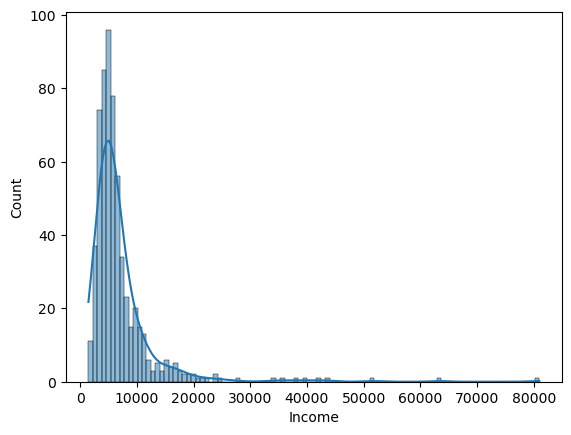

In [33]:
#to see how the data was disted in graphical
sns.histplot(df['Income'],kde=True)
plt.show()
#here we observe the data was rightskewed

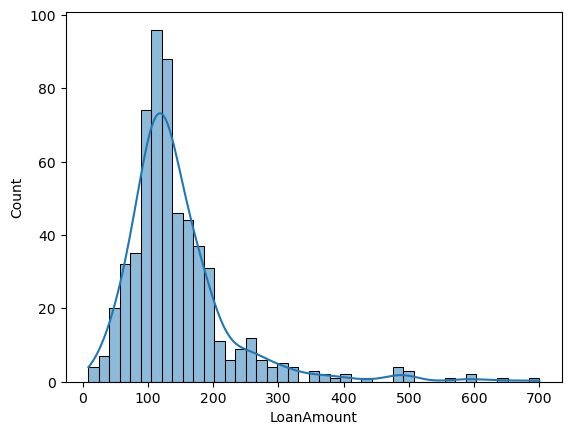

In [34]:
#to see how the data was disted in graphical
sns.histplot(df['LoanAmount'],kde=True)
plt.show()
#here we observe the data was rightskewed

In [35]:
#to check how the data was distribute on which side data was distributed
df[continous].skew()
#The data was right skewed

Income        5.633449
LoanAmount    2.677552
dtype: float64

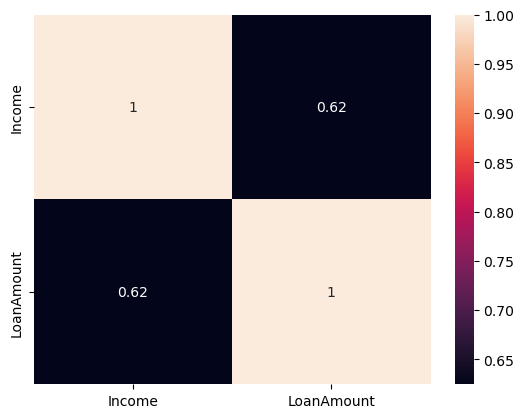

In [36]:
#To check the corrilation of two variables in graphical
sns.heatmap(df[continous].corr(),annot=True)
plt.show()
#here the corrilation is high b/w Income and LoanAmount

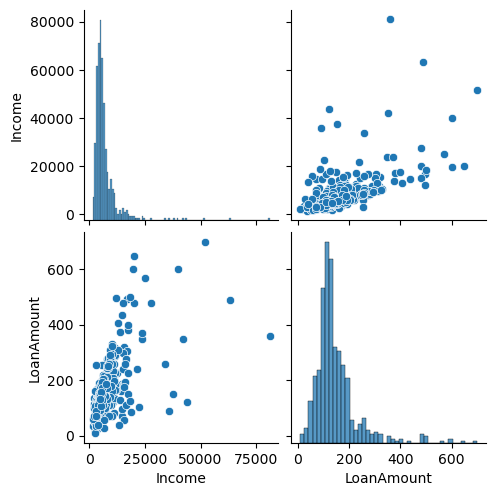

In [37]:
#to see the data in graphically
sns.pairplot(df[continous])

In [38]:
#here we check how the catagorical data distributed
df[discrete_cat].describe()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,614,582,564,614,614
unique,2,2,2,2,2,3,2
top,Male,Yes,Graduate,No,good,Semiurban,Y
freq,489,398,480,500,475,233,422


<Axes: xlabel='count', ylabel='Loan_Status'>

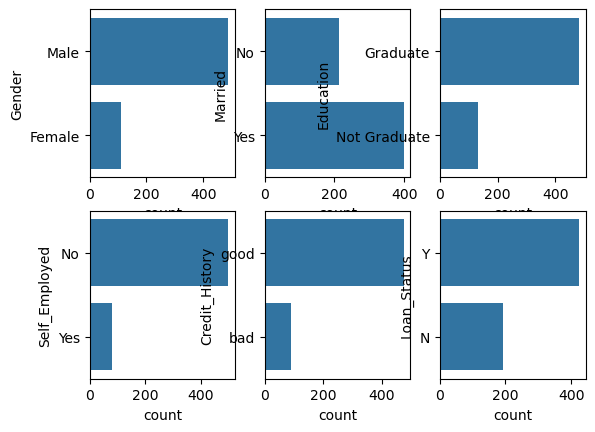

In [39]:
#here we see the all catagorical dta in one diagram in histogram
plt.subplot(2,3,1)
sns.countplot(df['Gender'])

plt.subplot(2,3,2)
sns.countplot(df['Married'])

plt.subplot(2,3,3)
sns.countplot(df['Education'])

plt.subplot(2,3,4)
sns.countplot(df['Self_Employed'])

plt.subplot(2,3,5)
sns.countplot(df['Credit_History'])

plt.subplot(2,3,6)
sns.countplot(df['Loan_Status'])

In [40]:
#checking null values
df.isnull().sum()
#here we found many missing values

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

**checking skewness**

In [41]:
df[continous].skew()

Income        5.633449
LoanAmount    2.677552
dtype: float64

**check outliers**

<Axes: ylabel='Income'>

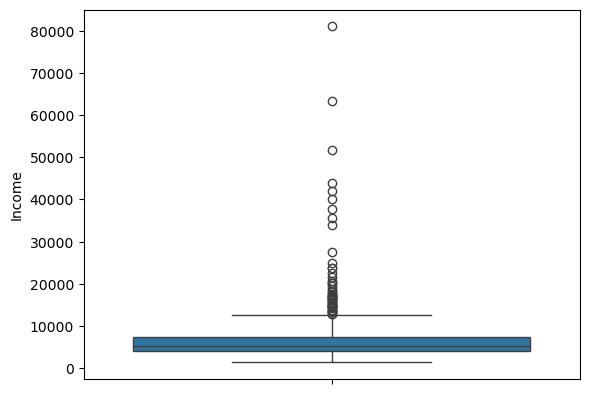

In [42]:
#using boxplot to check the outliers
sns.boxplot(df['Income'])
#here we find the outlier in this given business problem no need to treat the outliers

<Axes: ylabel='LoanAmount'>

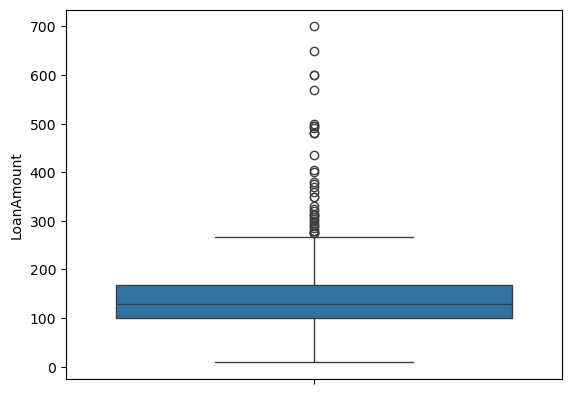

In [43]:
#using boxplot to check the outliers
sns.boxplot(df['LoanAmount'])
#here we find the outlier in this given business problem no need to treat the outliers

 # Step3: Data Preprocessing

**1.Data Cleaning**
- Wrong data
- Missing values
- Wrong data type
- duplicates
- outliers
  
**2.Data Wrangling**
- transformation(applicable on continous)
- scaling(applicable on continous)
- encoding(applicable on discrete catagorical)
- Dont apply any Data Wrangling technique on Count variables

In [44]:
#(Wrong Data treatment)
#in the given data on 'Dependents' column 3+is the wrong value
df['Dependents']=df['Dependents'].replace({'3+':3})#

In [45]:
#(Missing values treatment)
# We need to treat the missing values defenently
df['Dependents']=df['Dependents'].fillna(0)
#in the given data 'Dependents' have some missing NAN values so we convert as 0

df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
#in the given data 'Gender' is not manditory we may replace with mode

df['Married']=df['Married'].fillna(df['Married'].mode()[0])
#in the given data 'Married' is not manditory we may replace with mode

df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
#in the given data 'Self_Employed' is not manditory we may replace with mode

df=df.dropna(subset=['Income','LoanAmount','Loan_Amount_Term','Credit_History'])
#drop the null values in the above columns we don't replace,remove,retrain for the columns

In [46]:
#(Data type conversion)
df['Dependents']=df['Dependents'].astype('int')
#in the 'Dependents' after replace the data we need to convert the data type before the data in float to int 

df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype('int')
#in the 'Loan_Amount_Term' values in float then we have to treat as int

In [47]:
#(outliers treatment)
#in the given data no need to treat the the outliers some of the pepoles having high income along with they want high Loan's

In [48]:
#(Encoding)
#Encoding we have to do beacuse mechine may not know the catagorical data

df['Gender']=df['Gender'].replace({'Male':1,'Female':0})
df['Married']=df['Married'].replace({'Yes':1,'No':0})
df['Education']=df['Education'].replace({'Graduate':1,'Not Graduate':0})
df['Self_Employed']=df['Self_Employed'].replace({'Yes':1,'No':0})
df['Property_Area']=df['Property_Area'].replace({'Rural':0,'Semiurban':1,'Urban':2})
df['Credit_History']=df['Credit_History'].replace({'good':1,'bad':0})
df['Loan_Status']=df['Loan_Status'].replace({'Y':1,'N':0})


In [49]:
#(transformations)
#convert the skewed data to normal data
from scipy.stats import boxcox
df['Income'],a=boxcox(df['Income'])
df['LoanAmount'],c=boxcox(df['LoanAmount'])

In [50]:
df['Income'].skew()
#after convert the data to normal datacheckit once

-0.02776908801128399

In [51]:
df['LoanAmount'].skew()
#after convert the data to normal data checkit once

0.03828926265578848

In [52]:
#in one year having 12 months that's why we devide months by12
df['Loan_Amount_Term']=df['Loan_Amount_Term']/12

In [53]:
#(X&Y)
#processing the data save the columns as x&y
#here we take all the columns as i/p variables
x=df.drop('Loan_Status',axis=1)
#here we take 'Loan_Status' as the o/p variables
y=df['Loan_Status']

In [54]:
#(train-test split)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=True)
#here with in the data we split the 80% of data for train and remining 20% of data for test 

 # Step4: Modelling & Evolution

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier             # KNeighborsRegressor
from sklearn.svm import SVC                                    # SVR     
from sklearn.tree import DecisionTreeClassifier                # DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier            # RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier        # GradientBoostRegressor
from xgboost import XGClassifier                               #XGRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

**1.Logistic Regression**

In [56]:
#here no one can be provide thresold value so that prdefined threshold value is 0.5
#Modelling
from sklearn.linear_model import LogisticRegression
LR_model=LogisticRegression()
LR_model.fit(x_train,y_train)
#it will calculate probality ehere the probability was >0.5 as class'1' and <0.5 as class'0'

#prediction & Evolution on train data
ypred_train=LR_model.predict(x_train)

#calculate train accuracy b/w y_train and ypred_train
print('train accuracy:',accuracy_score(y_train,ypred_train))

#calculate cross validation for every fold we calculate accuracy we get 5 accuracy and take the avg of 5 accuracy
print('cv score:',cross_val_score(LR_model,x_train,y_train,cv=5,scoring='accuracy').mean())

#prediction & Evolution on test data
ypred_test=LR_model.predict(x_test)

#calculate test accuracy b/w y_test and ypred_test
print('test accuracy:',accuracy_score(y_test,ypred_test))

train accuracy: 0.8085106382978723
cv score: 0.803781512605042
test accuracy: 0.839622641509434


In [57]:
#checking the confusion matrix how they correctedly  
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

#checking overall classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

[[12 17]
 [ 0 77]]
              precision    recall  f1-score   support

           0       1.00      0.41      0.59        29
           1       0.82      1.00      0.90        77

    accuracy                           0.84       106
   macro avg       0.91      0.71      0.74       106
weighted avg       0.87      0.84      0.81       106



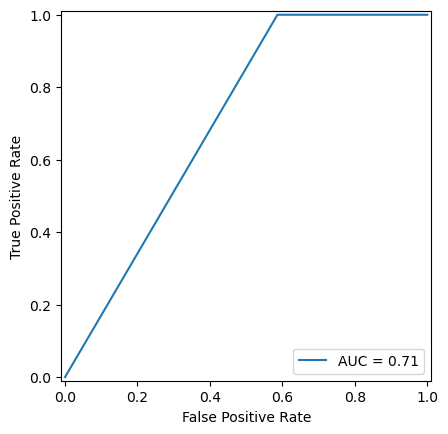

In [58]:
#AUC Cureve(Area Under the Curve)higher the accuracy batter the model
from sklearn.metrics import roc_curve,auc,RocCurveDisplay
fpr,tpr,thresholds=roc_curve(y_test,ypred_test)
roc_auc=auc(fpr,tpr)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()

In [59]:
#AUC Score,(Area Under the Curve score)higher the accuracy batter the model
from sklearn.metrics import roc_auc_score
print('auc score',roc_auc_score(y_test,ypred_test))

auc score 0.7068965517241379


**2.KNN**

In [60]:
#Hyperperameter tunning(trying the different values)
#increasing to the higher parameter
estimator = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1,50)),"p":[1,2]}
knn_grid = GridSearchCV(estimator, param_grid,scoring='accuracy',cv=5)
knn_grid.fit(x_train,y_train)

knn_grid.best_estimator_
#it will identify the nearest neighbors and with the p value the (p1 belongs to manhaten,p2 belongs to eculuven )

KNeighborsClassifier(n_neighbors=8, p=1)

In [61]:
#Modelling
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier(n_neighbors=8,p=1)
KNN_model.fit(x_train,y_train)
#it will calculate 

#prediction & Evolution on train data
ypred_train=KNN_model.predict(x_train)

#calculate train accuracy b/w y_train and ypred_train
print('train accuracy:',accuracy_score(y_train,ypred_train))

#calculate cross validation for every fold we calculate accuracy we get 5 accuracy and take the avg of 5 accuracy
print('cv score:',cross_val_score(KNN_model,x_train,y_train,cv=5,scoring='accuracy').mean())

#prediction & Evolution on test data
ypred_test=KNN_model.predict(x_test)

#calculate test accuracy b/w y_test and ypred_test
print('test accuracy:',accuracy_score(y_test,ypred_test))

train accuracy: 0.8037825059101655
cv score: 0.7493837535014005
test accuracy: 0.7358490566037735


In [62]:
#here no need to check confusion matrix becoz we focus on accuracy if we focus on precission or recall we hav to check confusion matrix

**3.SVM**

In [63]:
#Hyperperameter tunning(trying the different values)
#increasing to the higher parameter
from sklearn.svm import SVC
estimator=SVC()
param_grid={'C':[0.01,0.1,1],'kernel':['linear','rbf','sigmoid','ploy']}
svm_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
svm_grid.fit(x_train,y_train)
#c it gives number of support vectors
#kernel it select the lines we have the lines are('linear','rbf','sigmoid','ploy')

svm_grid.best_estimator_


SVC(C=0.1, kernel='linear')

In [64]:
#Modelling
from sklearn.svm import SVC
SVM_model=svm_grid.best_estimator_
SVM_model.fit(x_train,y_train)
#it will calculate 

#prediction & Evolution on train data
ypred_train=SVM_model.predict(x_train)

#calculate train accuracy b/w y_train and ypred_train
print('train accuracy:',accuracy_score(y_train,ypred_train))

#calculate cross validation for every fold we calculate accuracy we get 5 accuracy and take the avg of 5 accuracy
print('cv score:',cross_val_score(SVM_model,x_train,y_train,cv=5,scoring='accuracy').mean())

#prediction & Evolution on test data
ypred_test=SVM_model.predict(x_test)

#calculate test accuracy b/w y_test and ypred_test
print('test accuracy:',accuracy_score(y_test,ypred_test))

train accuracy: 0.8085106382978723
cv score: 0.8084873949579832
test accuracy: 0.839622641509434


**4.Decision Tree**

In [65]:
#hyperperameter tunning means in here  we do prunning
#*first create deafult DT model (fully grown tree without any prunning),so that ,we can unfderastanding the max_deplth

In [66]:
#Modelling,before the prunning or identify the depth of the tree based on that create a new model
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=True)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=True)

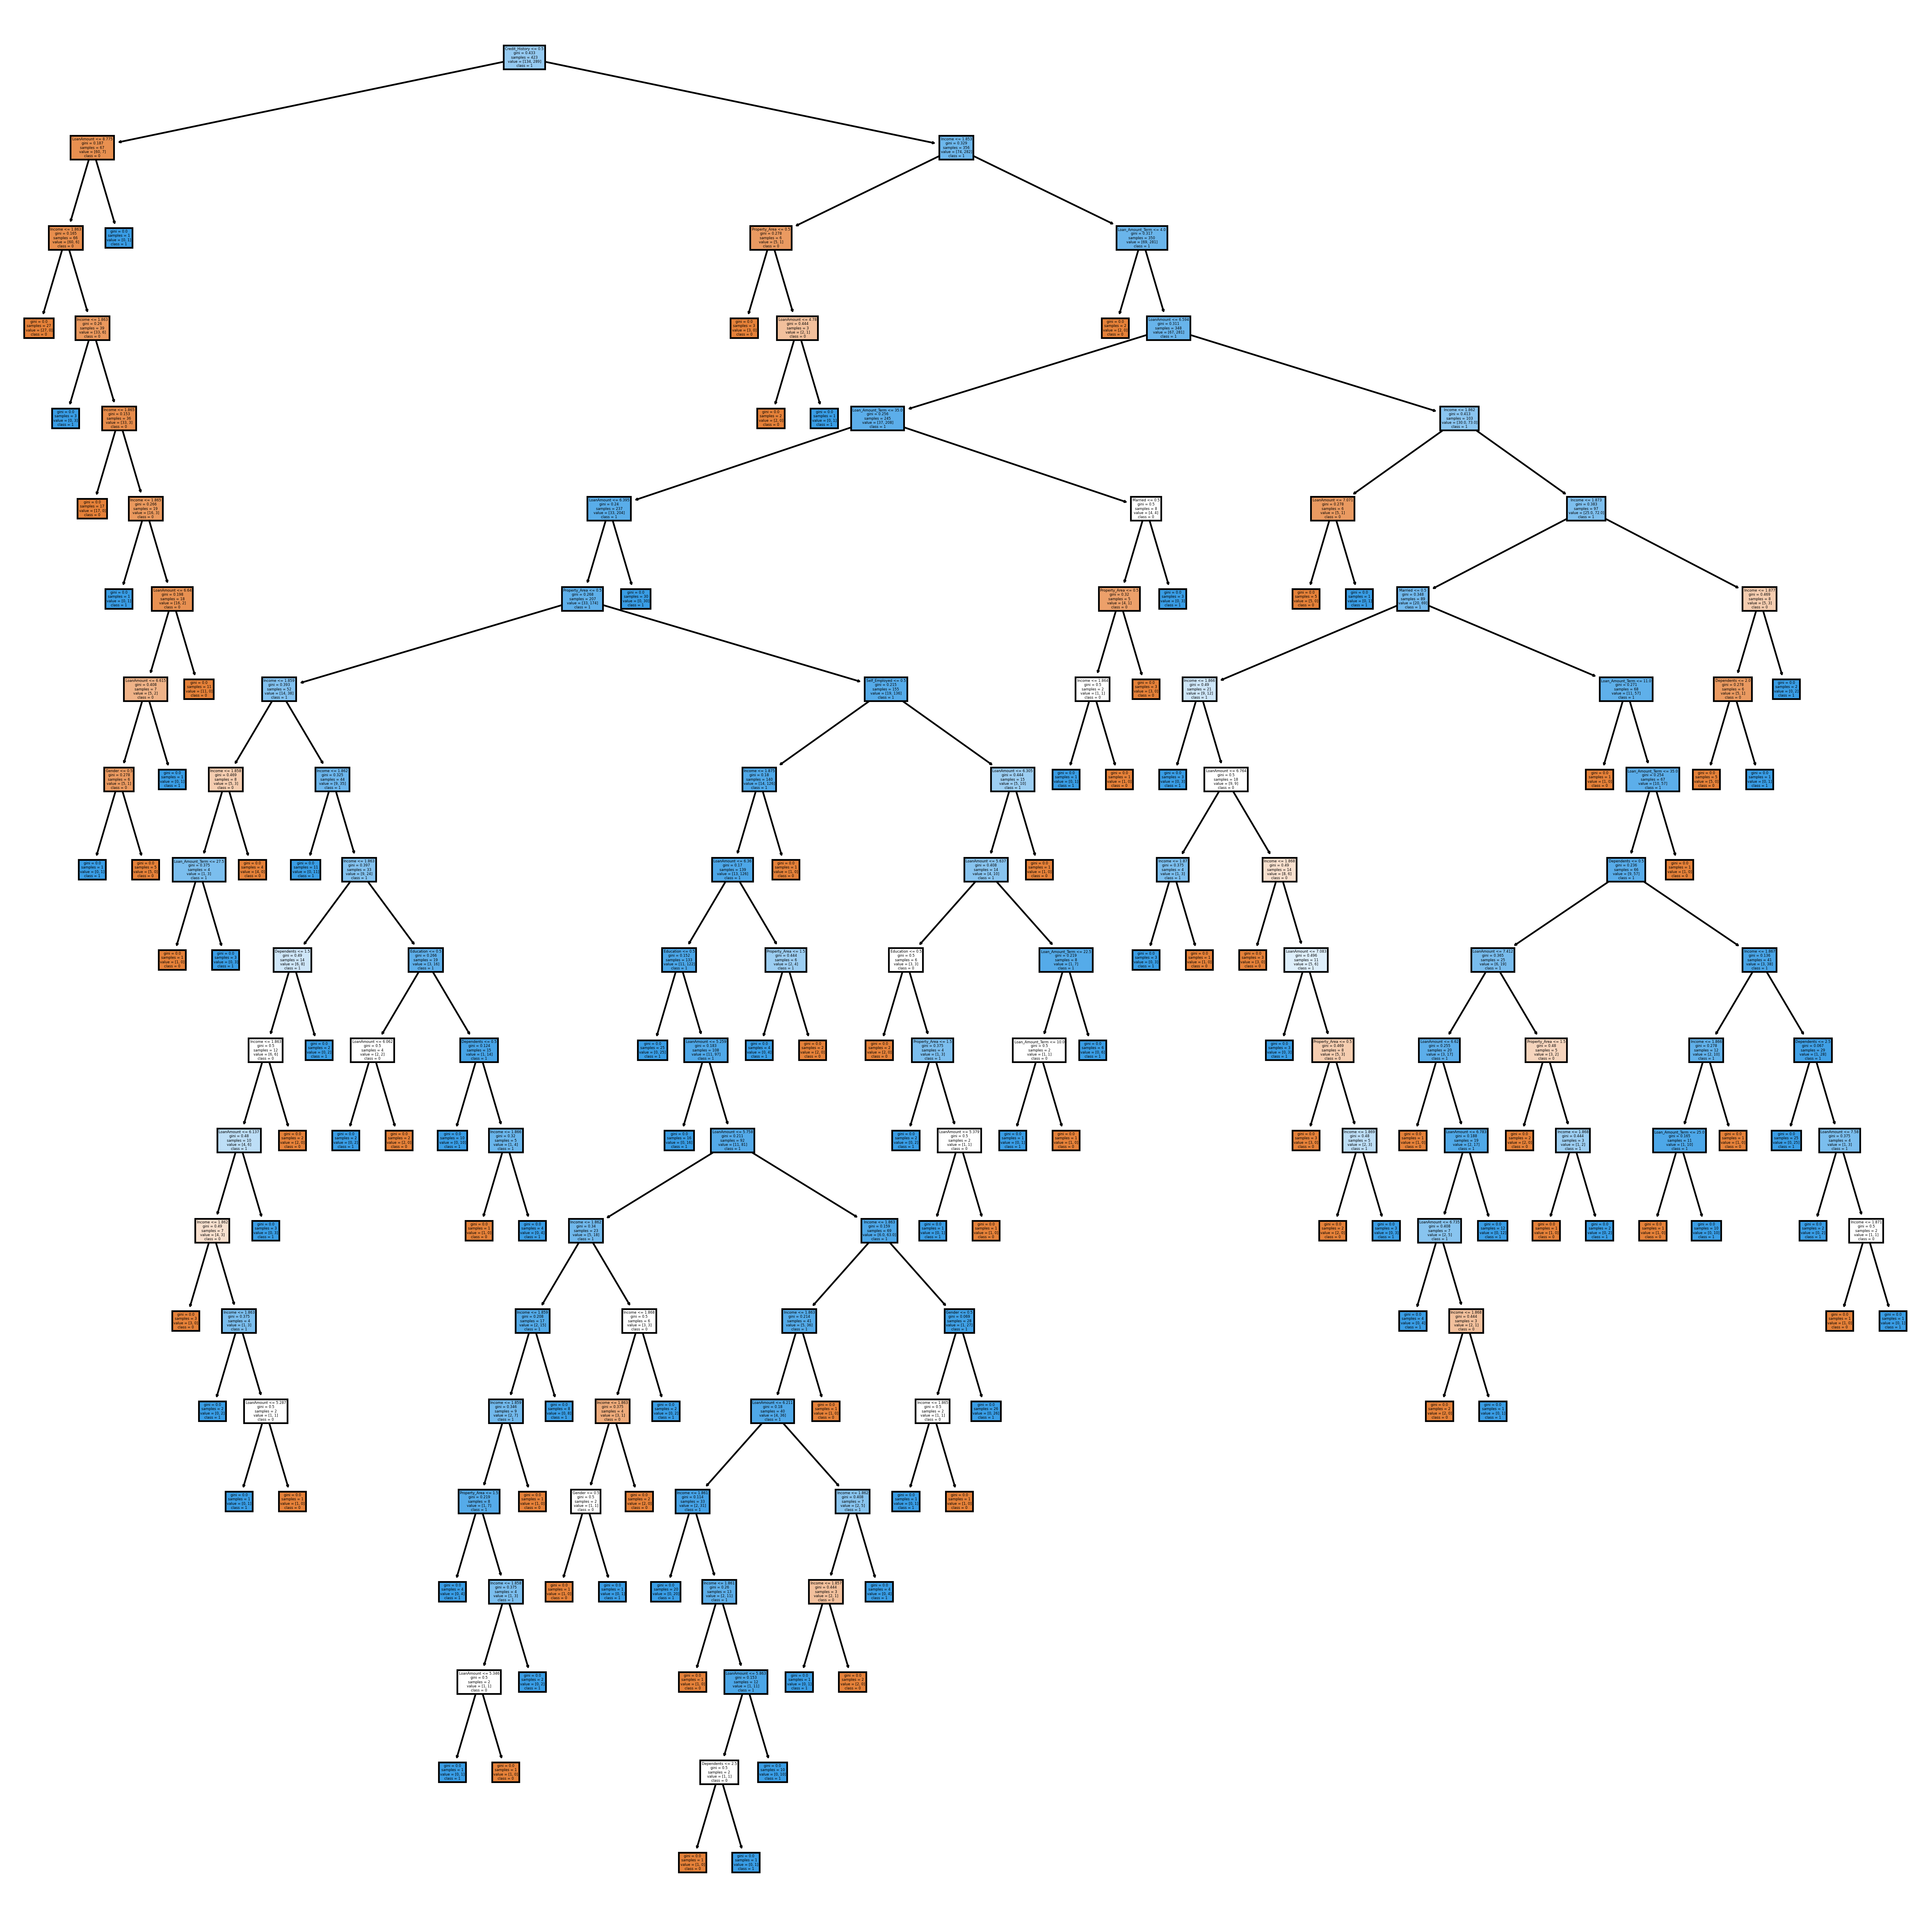

In [67]:
#watching the decision tree in a graphical way 

from sklearn.tree import plot_tree
plt.figure(figsize=(20,20),dpi=300)
plot_tree(dtc,filled=True,
          feature_names=x_train.columns.tolist(),
          class_names=['0','1'])
plt.show()

In [68]:
#Hyperperameter tunning 
estimator=DecisionTreeClassifier(random_state=True)

param_grid={'criterion':['gini','entropy'],
           'max_depth':list(range(1,15))}

dtc_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
dtc_grid.fit(x_train,y_train)

dtc_grid.best_estimator_

DecisionTreeClassifier(max_depth=1, random_state=True)

In [69]:
#modelling
dt=DecisionTreeClassifier(max_depth=1,random_state=True)
dt.fit(x_train,y_train)

#prediction & evolution on train data
ypred_train=dt.predict(x_train)
#prediction & Evolution on test data
ypred_test=dt.predict(x_test)

#calculate train accuracy b/w y_train and ypred_train
print('train accuracy',accuracy_score(y_train,ypred_train))
                                      
#calculate cross validation for every fold we calculate accuracy we get 5 accuracy and take the avg of 5 accuracy
print('cv score:',cross_val_score(dt,x_train,y_train,scoring='accuracy',cv=5).mean())

#calculate test accuracy b/w y_test and ypred_test
print('test accuracy:',accuracy_score(y_test,ypred_test))

train accuracy 0.8085106382978723
cv score: 0.8084873949579832
test accuracy: 0.839622641509434


In [70]:
#after the modelling we do the feature importances to know the importances of features depends on drop unimportant features 
dt.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [71]:
#important features identifying and then converted as data frame
feat_df=pd.DataFrame(data=dt.feature_importances_,
                    index=x.columns,
                    columns=['Importance'])
feat_df

,Importance
Gender,0.0
Married,0.0
Dependents,0.0
Education,0.0
Self_Employed,0.0
LoanAmount,0.0
Loan_Amount_Term,0.0
Credit_History,1.0
Property_Area,0.0
Income,0.0


In [72]:
#Dropping the remimining features which has >0 & identify the imp features
important_features_dt=feat_df[feat_df["Importance"]>0].index.tolist()
important_features_dt

['Credit_History']

- creating the final decision model with best pearameters along with best features

In [73]:

#selected imp features for train and test data
x_train_dt=x_train[important_features_dt]
x_test_dt=x_test[important_features_dt]

#selecting best estimator for (modelling)
dt=dtc_grid.best_estimator_
dt.fit(x_train_dt,y_train)

#prediction on imp features for train and test(evolution)
ypred_train=dt.predict(x_train_dt)
ypred_test=dt.predict(x_test_dt)

#calculate train accuracy b/w y_train and ypred_train
print('train accuracy:',accuracy_score(y_train,ypred_train))

#calculate cross validation for every fold we calculate accuracy we get 5 accuracy and take the avg of 5 accuracy
print('cv score:',cross_val_score(dt,x_train_dt,y_train,cv=5,scoring='accuracy').mean())

#calculate test accuracy b/w y_test and ypred_test
print('test accuracy:',accuracy_score(y_test,ypred_test))

train accuracy: 0.8085106382978723
cv score: 0.8084873949579832
test accuracy: 0.839622641509434


**5.Random Forest**

In [74]:
#Hyperperameter tunning 
estimator=RandomForestClassifier(random_state=True)

param_grid={'n_estimators':list(range(1,100))}

rf_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
rf_grid.fit(x_train,y_train)

rf=rf_grid.best_estimator_
rf

RandomForestClassifier(n_estimators=15, random_state=True)

In [75]:
#after the modelling we do the feature importances to know the importances of features depends on drop unimportant features 
rf.feature_importances_

array([0.02125048, 0.02896799, 0.05391343, 0.03101642, 0.01456987,
       0.22540476, 0.04306179, 0.27316943, 0.05505681, 0.25358902])

In [76]:
#important features identifying and then converted as data frame
feat_rf=pd.DataFrame(data=rf.feature_importances_,
                    index=x.columns,
                    columns=['Importance'])
feat_rf

,Importance
Gender,0.021250
Married,0.028968
Dependents,0.053913
Education,0.031016
Self_Employed,0.014570
LoanAmount,0.225405
Loan_Amount_Term,0.043062
Credit_History,0.273169
Property_Area,0.055057
Income,0.253589


In [77]:
#Dropping the remimining features which has >0 & identify the imp features
important_features_rf=feat_rf[feat_rf["Importance"]>0].index.tolist()
important_features_rf

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [1]:
#selected imp features for train and test data
x_train_rf=x_train[important_features_rf]
x_test_rf=x_test[important_features_rf]

#selecting best estimator for (modelling)
rf=rf_grid.best_estimator_
rf.fit(x_train_rf,y_train)

#prediction on imp features for train and test(evolution)
ypred_train=rf.predict(x_train_rf)
ypred_test=rf.predict(x_test_rf)

#calculate train accuracy b/w y_train and ypred_train
print('train accuracy:',accuracy_score(y_train,ypred_train))

#calculate cross validation for every fold we calculate accuracy we get 5 accuracy and take the avg of 5 accuracy
print('cv score:',cross_val_score(rf,x_train_rf,y_train,cv=5,scoring='accuracy').mean())

#calculate test accuracy b/w y_test and ypred_test
print('test accuracy:',accuracy_score(y_test,ypred_test))

NameError: name 'x_train' is not defined

**6.AdaBoost**

In [79]:
#Hyperperameter tunning 
estimator=AdaBoostClassifier(random_state=True)

param_grid={'n_estimators':list(range(1,50))}

ab_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
ab_grid.fit(x_train,y_train)

ab=ab_grid.best_estimator_
ab

AdaBoostClassifier(n_estimators=16, random_state=True)

In [80]:
#after the modelling we do the feature importances to know the importances of features depends on drop unimportant features 
ab.feature_importances_

array([0.    , 0.    , 0.0625, 0.0625, 0.    , 0.125 , 0.0625, 0.0625,
       0.125 , 0.5   ])

In [81]:
#important features identifying and then converted as data frame
feat_ab=pd.DataFrame(data=ab.feature_importances_,
                    index=x.columns,
                    columns=['Importance'])
feat_ab

,Importance
Gender,0.0000
Married,0.0000
Dependents,0.0625
Education,0.0625
Self_Employed,0.0000
LoanAmount,0.1250
Loan_Amount_Term,0.0625
Credit_History,0.0625
Property_Area,0.1250
Income,0.5000


In [82]:
#Dropping the remimining features which has >0 & identify the imp features
important_features_ab=feat_ab[feat_ab["Importance"]>0].index.tolist()
important_features_ab

['Dependents',
 'Education',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [83]:
#selected imp features for train and test data
x_train_ab=x_train[important_features_ab]
x_test_ab=x_test[important_features_ab]

#selecting best estimator for (modelling)
ab=ab_grid.best_estimator_
ab.fit(x_train_ab,y_train)

#prediction on imp features for train and test(evolution)
ypred_train=ab.predict(x_train_ab)
ypred_test=ab.predict(x_test_ab)

#calculate train accuracy b/w y_train and ypred_train
print('train accuracy:',accuracy_score(y_train,ypred_train))

#calculate cross validation for every fold we calculate accuracy we get 5 accuracy and take the avg of 5 accuracy
print('cv score:',cross_val_score(ab,x_train_ab,y_train,cv=5,scoring='accuracy').mean())

#calculate test accuracy b/w y_test and ypred_test
print('test accuracy:',accuracy_score(y_test,ypred_test))

train accuracy: 0.8486997635933806
cv score: 0.8084873949579832
test accuracy: 0.7924528301886793


**7.Gradent Boost**

In [84]:
#Hyperperameter tunning 
from sklearn.ensemble import GradientBoostingClassifier

estimator=GradientBoostingClassifier(random_state=True)

param_grid={'n_estimators':list(range(1,10)),
           'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
#how much error it going to rectifing on each and every column is  known learning rate it should be(0-1)
gb_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
gb_grid.fit(x_train,y_train)

gb=gb_grid.best_estimator_
gb

GradientBoostingClassifier(n_estimators=5, random_state=True)

In [85]:
#after the modelling we do the feature importances to know the importances of features depends on drop unimportant features 
gb.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.06733039, 0.02172607, 0.79113942, 0.00145384, 0.11835028])

In [86]:
#important features identifying and then converted as data frame
feat_gb=pd.DataFrame(data=gb.feature_importances_,
                    index=x.columns,
                    columns=['Importance'])
feat_gb

,Importance
Gender,0.000000
Married,0.000000
Dependents,0.000000
Education,0.000000
Self_Employed,0.000000
LoanAmount,0.067330
Loan_Amount_Term,0.021726
Credit_History,0.791139
Property_Area,0.001454
Income,0.118350


In [87]:
#Dropping the remimining features which has >0 & identify the imp features
important_features_gb=feat_gb[feat_gb["Importance"]>0].index.tolist()
important_features_gb

['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Income']

In [88]:
#selected imp features for train and test data
x_train_gb=x_train[important_features_gb]
x_test_gb=x_test[important_features_gb]

#selecting best estimator for (modelling)
gb=gb_grid.best_estimator_
gb.fit(x_train_gb,y_train)

#prediction on imp features for train and test(evolution)
ypred_train=gb.predict(x_train_gb)
ypred_test=gb.predict(x_test_gb)

#calculate train accuracy b/w y_train and ypred_train
print('train accuracy:',accuracy_score(y_train,ypred_train))

#calculate cross validation for every fold we calculate accuracy we get 5 accuracy and take the avg of 5 accuracy
print('cv score:',cross_val_score(gb,x_train_ab,y_train,cv=5,scoring='accuracy').mean())

#calculate test accuracy b/w y_test and ypred_test
print('test accuracy:',accuracy_score(y_test,ypred_test))

train accuracy: 0.8132387706855791
cv score: 0.8013725490196079
test accuracy: 0.839622641509434


**8.XGboost**

In [89]:
#Hyperperameter tunning 
from xgboost import XGBClassifier
estimator=XGBClassifier()

param_grid={'n_estimators':[10,20,40,100],
           'max_depth':[3,4,5],
           'gamma':[0,0.15,0.3,0.5,1]}
xgb_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
xgb_grid.fit(x_train,y_train)

xgb=xgb_grid.best_estimator_
xgb

ModuleNotFoundError: No module named 'xgboost'